# **_Bank GoodCredit wants to predict credit score for current credit card customers._**

#  Dataset Overview – Bank GoodCredit Credit Risk Project

## Business Case:

Bank GoodCredit wants to assess the **creditworthiness** of its credit card customers by predicting if a customer is likely to **default** (i.e., become 30+ days past due).
This helps reduce credit risk and improve loan decisions.

**Target Variable:**
`Bad_label`

* `0` → Good credit history
* `1` → Bad credit history (default risk)

---

###  **Dataset Description**

The data is stored in a **MySQL database** with the following three main tables:

---

#### 1. **Cust\_Account**

Customer’s historical account and payment information.

* `customer_no`
* `opened_dt`, `last_paymt_dt`, `closed_dt`
* `cur_balance_amt`, `creditlimit`, `cashlimit`
* `paymenthistory1`, `paymentfrequency`
* `rateofinterest`, `actualpaymentamount`
* ... *(more account-specific fields)*

---

#### 2. **Cust\_Enquiry**

Contains credit enquiry history for each customer.

* `customer_no`
* `enquiry_dt`, `enq_purpose`, `enq_amt`
* Used to evaluate customer's recent credit-seeking behavior.

---

#### 3. **Cust\_Demographics**

Includes demographic and anonymized model features.

* `customer_no`
* `feature_1` to `feature_79`
* `Bad_label` (target variable)

---

### **Project Goal**

Build a classification model using this data to:

* Analyze customer behavior
* Select relevant features
* Predict default risk (Bad\_label)
* Evaluate performance using Gini score and decile ranking

In [1]:
!pip install mysql-connector-python

In [2]:
import os  # Used to interact with the operating system
import mysql.connector # Used to connect to MySQL database and load datasets
import pandas as pd # Used for data cleaning, manipulation, and analysis
import numpy as np # Used for numerical operations and handling arrays
import matplotlib.pyplot as plt # Used for data visualization (creating charts and plots)
import warnings # Used to manage warning messages
import seaborn as sns # Used for statistical data visualization

# Ignore warning messages to keep the output clean
warnings.filterwarnings("ignore")

In [3]:
## Making connection to the database server
connection = mysql.connector.connect(
    host="18.136.157.135",  # Database server IP address
    user="dm_team1",  # Username for authentication
    password="DM!$Team&279@20!"  # Password for authentication
)

In [4]:
# Create a cursor object to interact with the MySQL database
cursor = connection.cursor()

# Execute the SQL command to list all available databases
cursor.execute('SHOW DATABASEs')

# Print each database name retrieved from the server
for db in cursor:
    print(db)

('information_schema',)
('project_banking',)


In [5]:
# Establish connection to the MySQL database server
connection = mysql.connector.connect(
    host="18.136.157.135",  # Database server IP address
    port = "3306",
    user="dm_team1",  # Username for authentication
    password="DM!$Team&279@20!",  # Password for authentication
    database="project_banking"  # Specify the database to connect to
)

#### Retrieve all tables from the 'project_banking' database
db_Tables = pd.read_sql_query("SHOW TABLES", connection)

# Display the list of tables
db_Tables

In [6]:
# Fetch all records from the Cust_Account table and store them in a DataFrame
customer_acc = pd.read_sql_query('SELECT * FROM Cust_Account',connection)

# Display the retrieved data
customer_acc

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,...,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,...,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,...,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,...,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,...,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,...,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,...,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,


In [7]:
# Fetch all records from the Cust_Demographics table and store them in a DataFrame
customer_demo = pd.read_sql_query('SELECT * FROM Cust_Demographics',connection)

# Display the retrieved data
customer_demo

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,...,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,...,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,...,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,...,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,...,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,...,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,...,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card Setup,14,68000,...,13,R,,,0000-00-00,0,99111XXXXX,1,N,0
23894,03-Nov-15,23895,30-Sep-15,Platinum Deligh,30-Sep-15,740,3,Card Setup,14,158000,...,10,R,,,0000-00-00,0,93100XXXXX,1,N,0


In [8]:
# Fetch all records from the Cust_Enquiry table and store them in a DataFrame
customer_enq = pd.read_sql_query('SELECT * FROM Cust_Enquiry',connection)

# Display the retrieved data
customer_enq

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000


In [9]:
# Export the 'customer_acc' DataFrame to a CSV file named 'customer_acc.csv'
# Set index=False to avoid writing row numbers (index) into the file
customer_acc.to_csv('customer_acc.csv', index=False)

# Export the 'customer_demo' DataFrame to a CSV file named 'customer_demo.csv'
# This typically contains demographic information like age, gender, etc.
customer_demo.to_csv('customer_demo.csv', index=False)

# Export the 'customer_enq' DataFrame to a CSV file named 'customer_enq.csv'
# This usually includes customer enquiries or interaction history
customer_enq.to_csv('customer_enq.csv', index=False)

In [10]:
df1 = pd.read_csv('customer_acc.csv')
df1

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,...,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,NaN,03-Oct-15,16201.0,...,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000.0,1400.0,NaN,3.0,5603.0
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,NaN,30-Sep-15,41028.0,...,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,NaN,NaN,NaN,NaN,NaN
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,...,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,NaN,31-May-15,20250.0,...,NaN,"""""""000000000000000""""""",NaN,01-May-15,01-Jan-15,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,NaN,30-Apr-15,24228.0,...,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,NaN,NaN,NaN,NaN,NaN
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584.0,...,NaN,"""""""000179146119089058029000XXX""""""",NaN,01-Apr-10,01-Aug-09,NaN,NaN,NaN,3.0,NaN
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,NaN,12-Apr-12,31-Dec-13,50844.0,...,NaN,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",NaN,01-Apr-12,01-Dec-10,NaN,NaN,NaN,3.0,NaN
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,NaN,07-Mar-12,15-Apr-15,35587.0,...,NaN,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000.0,6000.0,NaN,3.0,NaN


In [11]:
df2 = pd.read_csv('customer_demo.csv')
df2

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,...,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,...,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,...,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,...,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0
4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,...,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704.0,1.0,Card Setup,14.0,119000.0,...,13.0,R,Y,NaN,0000-00-00,0.0,XXXXX,1.0,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,NaN,NaN,2.0,Card Setup,14.0,35000.0,...,10.0,O,Y,NaN,0000-00-00,0.0,99101XXXXX,1.0,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748.0,3.0,Card Setup,14.0,68000.0,...,13.0,R,NaN,NaN,0000-00-00,0.0,99111XXXXX,1.0,N,0
23894,03-Nov-15,23895,30-Sep-15,Platinum Deligh,30-Sep-15,740.0,3.0,Card Setup,14.0,158000.0,...,10.0,R,NaN,NaN,0000-00-00,0.0,93100XXXXX,1.0,N,0


In [12]:
df3 = pd.read_csv('customer_enq.csv')
df3

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2.0,3500000.0
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5.0,500000.0
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0.0,50000.0
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10.0,50000.0
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10.0,1000.0
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5.0,200000.0
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10.0,50000.0
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10.0,50000.0
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1.0,330000.0


In [13]:
# Display the number of rows and columns in the  DataFrame
# Output will be in the format: (rows, columns)
df1.shape

(186329, 21)

In [14]:
# Display the number of rows and columns in the  DataFrame
# Output will be in the format: (rows, columns)
df2.shape

(23896, 83)

In [15]:
# Display the number of rows and columns in the  DataFrame
# Output will be in the format: (rows, columns)
df3.shape

(413188, 6)

In [16]:
# Remove duplicate rows in df1 based on the 'customer_no' column
# Keeps the first occurrence and drops any additional entries with the same 'customer_no'
df1 = df1.drop_duplicates(subset='customer_no')

# Remove duplicate rows in df2 based on the 'customer_no' column
# Ensures each customer appears only once in the demographic data
df2 = df2.drop_duplicates(subset='customer_no')

# Remove duplicate rows in df3 based on the 'customer_no' column
# Cleans up the enquiry data by removing repeated entries for the same customer
df3 = df3.drop_duplicates(subset='customer_no')

In [17]:
# Merge df1 (customer account data) and df3 (customer enquiry data) using an inner join on 'customer_no'
# This keeps only the rows where 'customer_no' exists in both df1 and df3
 # Then merge the result with df2 (customer demographic data), again using an inner join on 'customer_no'
          # This ensures the final DataFrame 'data' contains only those customers present in all three DataFrames
data = df1.merge(df3, how="inner", on="customer_no").merge(df2, how="inner", on="customer_no")

In [18]:
# Display merged DataFrame
data

,dt_opened_x,customer_no,upload_dt_x,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,...,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
1,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,...,13.0,R,NaN,NaN,0000-00-00,0.0,XXXXX,1.0,N,1
2,02-Nov-15,11742,13-Oct-15,10,1,27-Aug-15,NaN,NaN,31-Aug-15,NaN,...,10.0,O,NaN,NaN,0000-00-00,0.0,XXXXX,1.0,N,0
3,16-Nov-15,12379,30-Jul-15,10,1,24-Aug-07,28-Feb-11,07-Jan-14,31-May-15,195074.0,...,31.0,O,NaN,NaN,0000-00-00,0.0,98400XXXXX,1.0,N,0
4,27-Aug-15,17744,10-Aug-15,10,1,22-Aug-14,25-Jun-15,NaN,11-Jul-15,15702.0,...,33.0,O,NaN,NaN,0000-00-00,0.0,99100XXXXX,1.0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,26-Oct-15,4614,05-Oct-15,10,1,05-Nov-14,04-Sep-15,NaN,17-Sep-15,18732.0,...,10.0,R,NaN,NaN,0000-00-00,0.0,88023XXXXX,1.0,N,0
23892,17-Dec-15,13985,07-Sep-15,5,1,21-Jul-15,NaN,NaN,31-Jul-15,200000.0,...,2.0,O,N,NaN,0000-00-00,0.0,93461XXXXX,1.0,N,0
23893,06-Oct-15,10224,20-Aug-15,7,1,29-Dec-14,04-Jul-15,04-Jul-15,31-Jul-15,80000.0,...,10.0,O,NaN,NaN,0000-00-00,0.0,XXXXX,1.0,N,0
23894,07-Aug-15,16778,27-Jul-15,10,1,13-Apr-12,25-Apr-15,NaN,31-May-15,6095.0,...,10.0,R,NaN,NaN,0000-00-00,0.0,98739XXXXX,1.0,N,0


## Basic Check :-

In [19]:
data.head()  #showing first 5 rows of dataset

,dt_opened_x,customer_no,upload_dt_x,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,...,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
1,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,...,13.0,R,NaN,NaN,0000-00-00,0.0,XXXXX,1.0,N,1
2,02-Nov-15,11742,13-Oct-15,10,1,27-Aug-15,NaN,NaN,31-Aug-15,NaN,...,10.0,O,NaN,NaN,0000-00-00,0.0,XXXXX,1.0,N,0
3,16-Nov-15,12379,30-Jul-15,10,1,24-Aug-07,28-Feb-11,07-Jan-14,31-May-15,195074.0,...,31.0,O,NaN,NaN,0000-00-00,0.0,98400XXXXX,1.0,N,0
4,27-Aug-15,17744,10-Aug-15,10,1,22-Aug-14,25-Jun-15,NaN,11-Jul-15,15702.0,...,33.0,O,NaN,NaN,0000-00-00,0.0,99100XXXXX,1.0,N,0


In [20]:
data.tail()  # showung last 5 rows of dataset

,dt_opened_x,customer_no,upload_dt_x,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
23891,26-Oct-15,4614,05-Oct-15,10,1,05-Nov-14,04-Sep-15,NaN,17-Sep-15,18732.0,...,10.0,R,NaN,NaN,0000-00-00,0.0,88023XXXXX,1.0,N,0
23892,17-Dec-15,13985,07-Sep-15,5,1,21-Jul-15,NaN,NaN,31-Jul-15,200000.0,...,2.0,O,N,NaN,0000-00-00,0.0,93461XXXXX,1.0,N,0
23893,06-Oct-15,10224,20-Aug-15,7,1,29-Dec-14,04-Jul-15,04-Jul-15,31-Jul-15,80000.0,...,10.0,O,NaN,NaN,0000-00-00,0.0,XXXXX,1.0,N,0
23894,07-Aug-15,16778,27-Jul-15,10,1,13-Apr-12,25-Apr-15,NaN,31-May-15,6095.0,...,10.0,R,NaN,NaN,0000-00-00,0.0,98739XXXXX,1.0,N,0
23895,11-Jun-15,1611,25-May-15,10,1,02-Feb-07,13-Jan-11,17-Mar-11,17-Oct-11,97741.0,...,2.0,R,NaN,NaN,0000-00-00,0.0,80085XXXXX,1.0,N,0


In [21]:
data.describe(include="O") # showing categorical column's information

,dt_opened_x,upload_dt_x,opened_dt,last_paymt_dt,closed_dt,reporting_dt,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,...,feature_60,feature_61,feature_62,feature_63,feature_70,feature_72,feature_73,feature_75,feature_77,feature_79
count,23896,23896,23890,18986,2886,23896,23896,3426,23896,23896,...,23881,9,23881,23881,23881,23881,2945,23881,23896,23881
unique,197,75,2817,1566,1500,695,2661,1038,141,147,...,2,8,2,491,133,2,2,62,3124,2
top,16-Nov-15,21-Apr-15,31-Mar-15,05-Sep-15,04-Feb-15,31-Jul-15,"""""""000""""""","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Apr-15,...,N,GNWX-B,Y,2010-0,0-0,R,Y,0000-00-00,XXXXX,N
freq,699,587,152,344,75,1912,3017,481,3175,1533,...,23563,2,23876,1670,18235,15617,2126,23820,2149,23876


In [22]:
data.info()#showing information about all columns of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Columns: 108 entries, dt_opened_x to Bad_label
dtypes: float64(40), int64(5), object(63)
memory usage: 19.7+ MB


In [23]:
data.shape

(23896, 108)

In [24]:
data.isnull().sum()

dt_opened_x     0
customer_no     0
upload_dt_x     0
acct_type       0
owner_indic     0
               ..
feature_76     15
feature_77      0
feature_78     15
feature_79     15
Bad_label       0
Length: 108, dtype: int64

## Basic Data Preprocessing :-

In [25]:
date_col = [
    'dt_opened_x', 'upload_dt_x', 'last_paymt_dt',
    'reporting_dt', 'paymt_str_dt', 'paymt_end_dt', 'dt_opened_y', 'entry_time',
    'feature_2', 'feature_21', 'feature_53', 'feature_54','dt_opened', 
    'upload_dt_y', 'enquiry_dt','feature_30','feature_39','feature_63','feature_75']


cat_col = [
    'paymenthistory1', 'paymenthistory2', 'feature_1', 'feature_5', 'feature_8',
    'feature_9', 'feature_11', 'feature_12', 'feature_13', 'feature_15', 'feature_16',
    'feature_18', 'feature_20', 'feature_22', 'feature_23', 'feature_24', 'feature_27',
    'feature_28', 'feature_32', 'feature_33', 'feature_36', 'feature_37', 'feature_38',
    'feature_43', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_50',
    'feature_77', 'feature_51', 'feature_57', 'feature_58', 'feature_59', 'feature_60',
    'feature_61','feature_62', 'feature_72', 'feature_73', 'feature_79'
]


num_col = [
    'customer_no', 'acct_type', 'owner_indic', 'high_credit_amt', 'cur_balance_amt',
    'amt_past_due', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency',
    'actualpaymentamount', 'feature_3', 'feature_4', 'feature_6', 'feature_7',
    'feature_10', 'feature_14', 'feature_17', 'feature_19', 'feature_25', 'feature_26',
    'feature_29', 'feature_35', 'feature_40', 'feature_41', 'feature_42',
    'feature_44', 'feature_52', 'feature_55', 'feature_56', 'feature_64', 'feature_65',
    'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_71', 'feature_74',
    'Bad_label', 'feature_34', 'feature_31', 'enq_purpose', 'enq_amt',
    'feature_49', 'feature_76', 'feature_78'
]

In [26]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [27]:
# Loop through each column name in the list 'cat_col'
# These are assumed to be categorical columns in the DataFrame
for i in cat_col:
    
    # Convert the data type of each column to 'object' (which is used for strings/categorical data in pandas)
    data[i] = data[i].astype("object")

In [28]:
# Loop through each column name in the list 'num_col'
# These are assumed to be numerical columns in the DataFrame
for i in num_col:
    
    # Convert each column to numeric type using pandas 'pd.to_numeric'
    # The 'errors='coerce'' argument replaces any non-numeric values with NaN (Not a Number)
    data[i] = pd.to_numeric(data[i], errors='coerce')

In [29]:
# Convert the 'opened_dt' column to a datetime format using 'datetime64[ns]'
# This ensures that the 'opened_dt' column is treated as a datetime type in pandas
data["opened_dt"] = data["opened_dt"].astype("datetime64[ns]")

# Convert the 'closed_dt' column to a datetime format using 'datetime64[ns]'
# This ensures that the 'closed_dt' column is treated as a datetime type in pandas
data["closed_dt"] = data["closed_dt"].astype("datetime64[ns]")

# Feature Engineering :-

> * feature engineering is the process of creating new features or transforming existing ones to improve model performance. Below are engineered features for credit risk analysis based on account history, enquiry records, and demographic data.


##  Data Preprocessing Overview

Data preprocessing prepares raw data for modeling by cleaning inaccuracies, handling missing values, and encoding categorical features. It also involves scaling numerical data and selecting relevant features. This process ensures data quality, enhances model performance, and improves training efficiency.

---

### **Data Cleaning**

Removing or fixing inaccuracies in the dataset, such as:

* Duplicate records
* Inconsistent formatting
* Irrelevant or redundant columns

---

### **Handling Missing Values**

Missing data can negatively impact models. Common strategies include:

* Filling with statistical values like **mean**, **median**, or **mode**
* Using placeholders (e.g., `"Unknown"` or `-999`)
* Dropping rows or columns with excessive missing values

---

### **Encoding Categorical Variables**

Machine learning algorithms require numerical input. Categorical data like `"Gender"` or `"City"` must be converted using:

* **Label Encoding** – for ordinal categories
* **One-Hot Encoding** – for nominal categories

---

### **Scaling and Normalization**

To ensure that all features contribute equally to the model:

* **Normalization** scales values between 0 and 1
  
---

### **Feature Selection and Extraction**

Improving model performance by:

* **Feature Selection**: Keeping only the most relevant features based on statistical tests or model-based importance
* **Feature Extraction**: Creating new features (e.g., combining year and month into a time series index) that reveal hidden patterns or reduce dimensionality.

In [30]:
# Check null values only in specified categorical columns
cat_null = data[cat_col].isnull().sum()

# Display only columns that actually have null values
cat_null[cat_null > 0]

paymenthistory2    20470
feature_1             15
feature_5             15
feature_8          22635
feature_9          22635
feature_11            15
feature_12            15
feature_13         13004
feature_15            23
feature_16            27
feature_18         23878
feature_23            15
feature_24           640
feature_27          3637
feature_28            15
feature_32            15
feature_33            15
feature_36          5682
feature_37          5682
feature_38          5682
feature_43            15
feature_45         13713
feature_46            94
feature_48         18399
feature_50            15
feature_51         11422
feature_57         21503
feature_58            15
feature_59            15
feature_60            15
feature_61         23887
feature_62            15
feature_72            15
feature_73         20951
feature_79            15
dtype: int64

In [31]:
# Check null values only in specified categorical columns
num_null = data[num_col].isnull().sum()

# Display columns
num_null

customer_no                0
acct_type                  0
owner_indic                0
high_credit_amt         1065
cur_balance_amt            0
amt_past_due           23494
creditlimit            15811
cashlimit              17140
rateofinterest         20833
paymentfrequency       13529
actualpaymentamount    16197
feature_3               2836
feature_4                 15
feature_6                 15
feature_7                 15
feature_10             23846
feature_14              7733
feature_17             22918
feature_19                15
feature_25                15
feature_26                15
feature_29                15
feature_35                15
feature_40                15
feature_41                15
feature_42                15
feature_44                15
feature_52                15
feature_55                15
feature_56                15
feature_64                15
feature_65                15
feature_66                15
feature_67                15
feature_68    

In [32]:
for col in cat_null.index:
    mode_value = data[col].mode()[0]  # Get the mode (most frequent value)
    data[col].fillna(mode_value, inplace=True)

In [33]:
# Check null values only in specified categorical columns
cat_null = data[cat_col].isnull().sum()

# Display only columns that actually have null values
cat_null

paymenthistory1    0
paymenthistory2    0
feature_1          0
feature_5          0
feature_8          0
feature_9          0
feature_11         0
feature_12         0
feature_13         0
feature_15         0
feature_16         0
feature_18         0
feature_20         0
feature_22         0
feature_23         0
feature_24         0
feature_27         0
feature_28         0
feature_32         0
feature_33         0
feature_36         0
feature_37         0
feature_38         0
feature_43         0
feature_45         0
feature_46         0
feature_47         0
feature_48         0
feature_50         0
feature_77         0
feature_51         0
feature_57         0
feature_58         0
feature_59         0
feature_60         0
feature_61         0
feature_62         0
feature_72         0
feature_73         0
feature_79         0
dtype: int64

In [34]:
for col in num_null.index:
    median_value = data[col].median()  # Get median of the column
    data[col].fillna(median_value, inplace=True)

In [35]:
# Check null values only in specified categorical columns
cat_null = data[cat_col].isnull().sum()

# Display only columns that actually have null values
cat_null

paymenthistory1    0
paymenthistory2    0
feature_1          0
feature_5          0
feature_8          0
feature_9          0
feature_11         0
feature_12         0
feature_13         0
feature_15         0
feature_16         0
feature_18         0
feature_20         0
feature_22         0
feature_23         0
feature_24         0
feature_27         0
feature_28         0
feature_32         0
feature_33         0
feature_36         0
feature_37         0
feature_38         0
feature_43         0
feature_45         0
feature_46         0
feature_47         0
feature_48         0
feature_50         0
feature_77         0
feature_51         0
feature_57         0
feature_58         0
feature_59         0
feature_60         0
feature_61         0
feature_62         0
feature_72         0
feature_73         0
feature_79         0
dtype: int64

In [36]:
data.shape

(23896, 108)

In [37]:
# Drop the columns listed in 'date_col' from the DataFrame 'data'
# 'axis=1' specifies that columns (not rows) should be dropped
# 'inplace=True' modifies the 'data' DataFrame directly without needing to assign the result to a new variable
data.drop(date_col, axis=1, inplace=True)

In [38]:
# Calculate the mode (most frequent value) of the 'closed_dt' column
# The mode is useful for understanding the most common date in the 'closed_dt' column
# It returns a pandas Series, so you can access the first mode value using [0] if needed
data['closed_dt'].mode()

0   2015-02-04
Name: closed_dt, dtype: datetime64[ns]

In [39]:
# Calculate the mode (most frequent value) of the 'opened_dt' column
# The mode is useful for understanding the most common date in the 'opened_dt' column
# It returns a pandas Series, so you can access the first mode value using [0] if needed
data['opened_dt'].mode()

0   2015-03-31
Name: opened_dt, dtype: datetime64[ns]

In [40]:
# Replace missing (null) values in the 'closed_dt' column with a specific date ('2015-02-04')
# 'data['closed_dt'].isnull()' identifies rows where 'closed_dt' is null
# 'data.loc' is used to update the values in these rows, setting them to the specified date
data.loc[data['closed_dt'].isnull(), 'closed_dt'] = '2015-02-04'


In [41]:
# Replace missing (null) values in the 'opened_dt' column with a specific date ('2015-03-31')
# 'data['opened_dt'].isnull()' identifies rows where 'opened_dt' is null
# 'data.loc' is used to update the values in these rows, setting them to the specified date
data.loc[data['opened_dt'].isnull(),'opened_dt'] = '2015-03-31'

In [42]:
data.isnull().sum()

customer_no             0
acct_type               0
owner_indic             0
opened_dt               0
closed_dt               0
high_credit_amt         0
cur_balance_amt         0
amt_past_due            0
paymenthistory1         0
paymenthistory2         0
creditlimit             0
cashlimit               0
rateofinterest          0
paymentfrequency        0
actualpaymentamount     0
enq_purpose             0
enq_amt                 0
feature_1               0
feature_3               0
feature_4               0
feature_5               0
feature_6               0
feature_7               0
feature_8               0
feature_9               0
feature_10              0
feature_11              0
feature_12              0
feature_13              0
feature_14              0
feature_15              0
feature_16              0
feature_17              0
feature_18              0
feature_19              0
feature_20              0
feature_22              0
feature_23              0
feature_24  

In [43]:
# Drop specific columns from the 'data' DataFrame
# The list inside the 'drop()' function contains the column names to be removed
# 'axis=1' specifies that columns (not rows) should be dropped
# 'inplace=True' modifies the original 'data' DataFrame directly without creating a new DataFrame
data.drop(['customer_no', 'paymenthistory1', 'paymenthistory2', 'feature_10', 'feature_18', 
           'feature_20', 'feature_22', 'feature_24', 'feature_45', 'feature_47', 'feature_49', 
           'feature_61', 'feature_77'], axis=1, inplace=True)

In [44]:
# Select columns from the 'data' DataFrame that have the data type 'object'
# 'object' type typically represents categorical or string data in pandas
# 'select_dtypes(include=['object'])' filters columns with 'object' type
# '.columns' retrieves the column names of the selected columns
# '.tolist()' converts the column names into a list and stores it in 'cat_col'
cat_col = data.select_dtypes(include=['object']).columns.tolist()

In [45]:
# Select columns from the 'data' DataFrame that have numeric data types: 'float64' or 'int64'
# 'float64' and 'int64' represent continuous and discrete numeric values, respectively
# 'select_dtypes(include=['float64', 'int64'])' filters columns with numeric types
# '.columns' retrieves the column names of the selected columns
# '.tolist()' converts the column names into a list and stores it in 'num_col'
num_col = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [46]:
# Step 1: Ensure 'Bad_label' is numeric
data['Bad_label'] = pd.to_numeric(data['Bad_label'], errors='coerce')

# Step 2: Filter only numeric columns from the DataFrame
num_data = data[num_col].select_dtypes(include=['number'])

# Step 3: Add 'Bad_label' to the numeric data
num_data['Bad_label'] = data['Bad_label']

# Step 4: Compute correlation matrix
corr_matrix = num_data.corr()

# Step 5: Extract correlation of all features with 'Bad_label' (excluding itself)
corr_series = corr_matrix['Bad_label'].drop('Bad_label')

# Step 6: Sort by absolute correlation
corr_sorted = corr_series.abs().sort_values(ascending=False)

In [47]:
# Loop through each numeric column in the 'num_col' list
for i in num_col:
    
    # If the column is in the 'corr_sorted' list (i.e., has a very weak correlation with 'Bad_label'), skip it
    if i in corr_sorted:
        continue  # Skip the column and move to the next iteration of the loop
    
    # If the column is not in the 'corr_sorted' list, print the column name
    else:
        print(i)  # This will display columns that have a moderate to strong correlation with 'Bad_label'

Bad_label


In [48]:
data.shape

(23896, 76)

# EDA :- Exploratory Data Analysis
### Univarinat Analysis

<Axes: title={'center': 'Target Distribution'}, xlabel='Bad_label'>

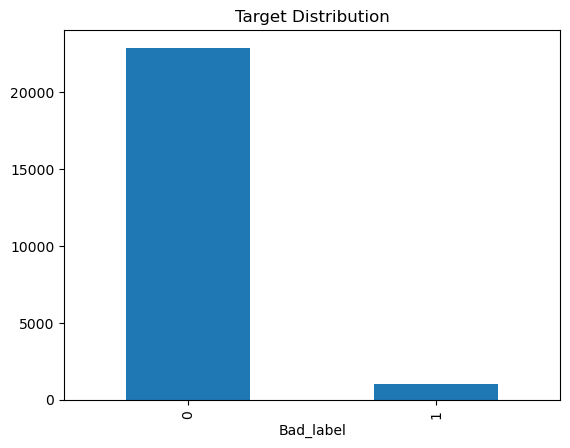

In [49]:
# Distribution of target variable
data['Bad_label'].value_counts(normalize=True)
data['Bad_label'].value_counts().plot(kind='bar', title='Target Distribution')

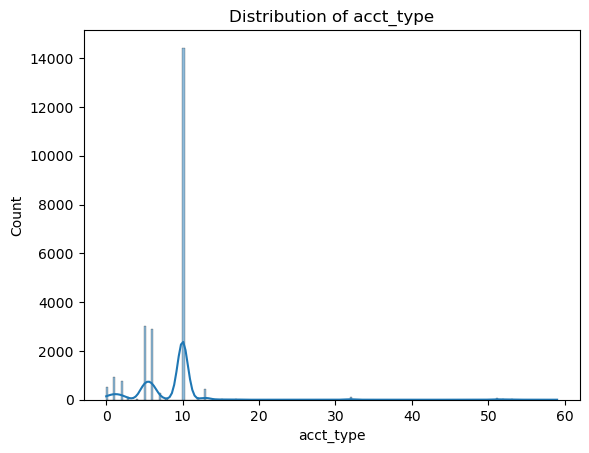

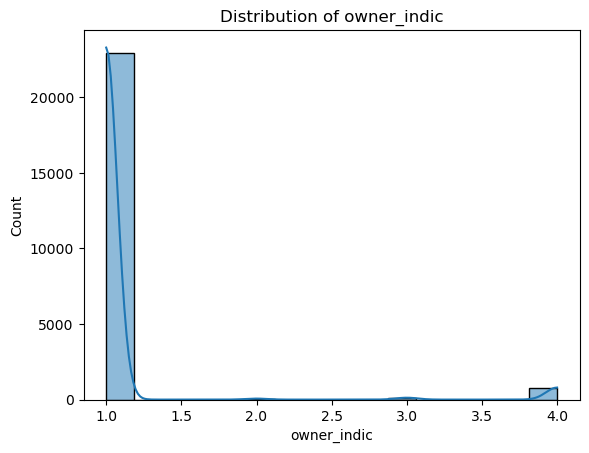

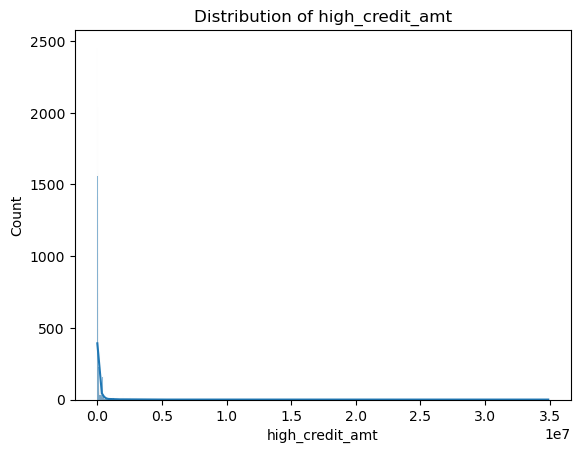

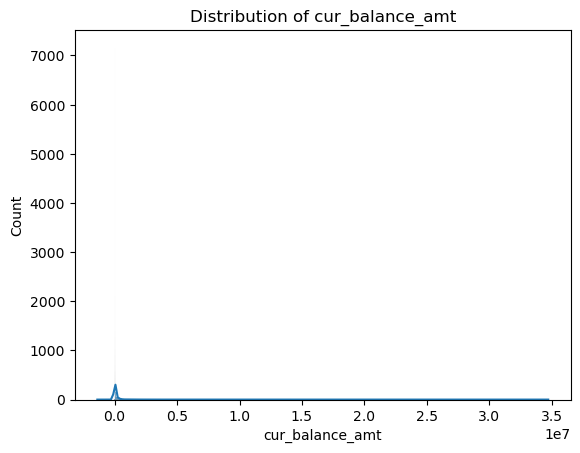

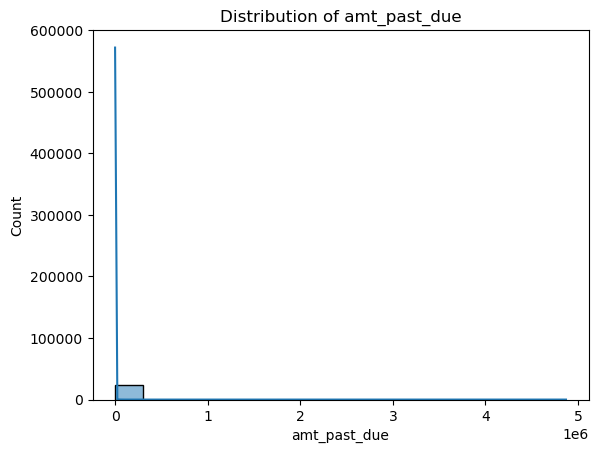

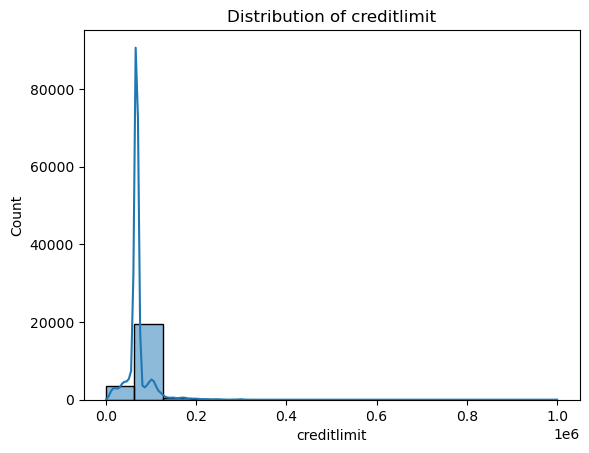

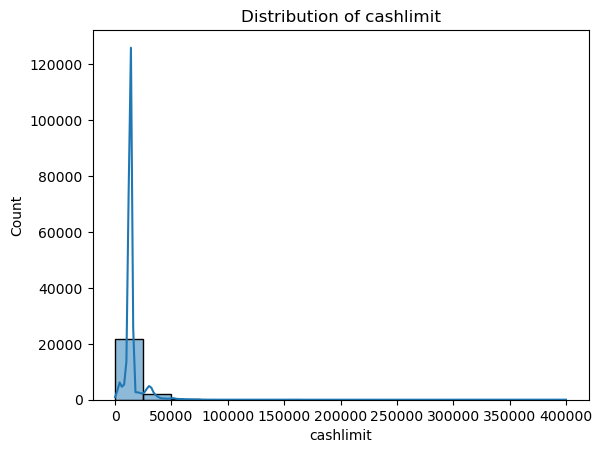

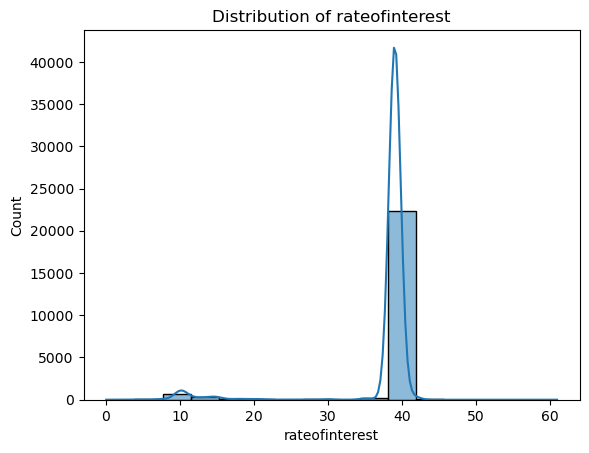

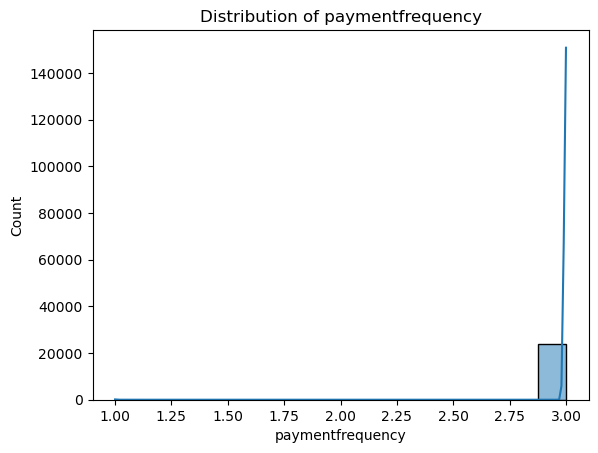

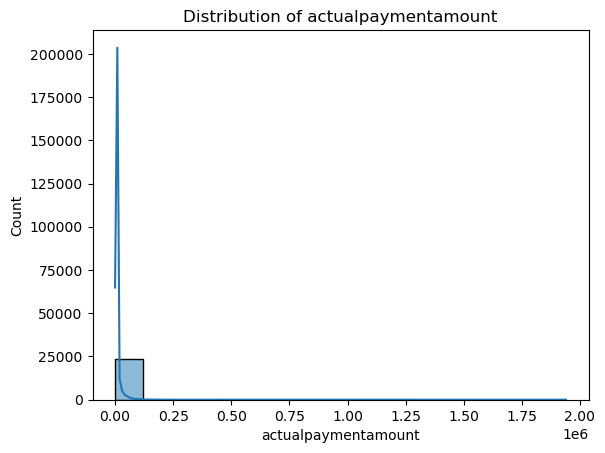

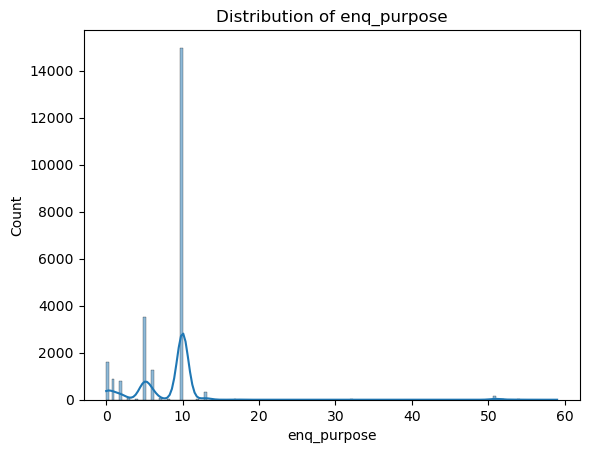

In [ ]:
# For numeric
for col in num_col:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# For categorical
for col in cat_col:
    plt.figure()
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Count plot of {col}")
    plt.show()

In [ ]:
# Set the size of the entire figure (25x35) for better spacing between subplots
plt.figure(figsize=(25, 35))  

# Initialize a counter to manage subplot positions
num = 1

# Loop through each categorical column in the 'cat_col' list
for i in cat_col:
    
    # Only plot columns with less than or equal to 50 unique values (low-cardinality)
    if data[i].nunique() <= 50:
        
        # Create a subplot with a grid of 6 rows and 5 columns to fit multiple plots
        plt.subplot(6, 5, num)
        
        # Plot a histogram with a KDE (Kernel Density Estimate) for the categorical feature 'i'
        # 'sns.histplot()' shows the distribution, and 'kde=True' adds the KDE curve
        sns.histplot(data=data, x=i, kde=True, color='skyblue')
        
        # Plot a count plot (bar plot) for the categorical feature 'i'
        # 'sns.countplot()' shows the frequency of each category in the feature
        # 'palette="viridis"' sets the color scheme
        # 'order=data[i].value_counts().index' ensures the categories are ordered by their frequency
        sns.countplot(data=data, x=i, palette='viridis', order=data[i].value_counts().index)
        
        # Set the x-axis label to the column name with a larger font size for better readability
        plt.xlabel(i, fontsize=14)
        
        # Rotate the x-axis labels by 45 degrees and align them to the right for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Adjust the layout of the plots to prevent overlapping and ensure proper spacing between subplots
        plt.tight_layout(pad=2)  
        
        # Increment the subplot number to move to the next subplot position
        num += 1  

# Show the plots after all subplots are created
plt.show()

##  Feature Distribution Summary & Recommendations

###  Well-distributed Features
These features show a good spread across categories and are likely useful for modeling:
- `feature_1`
- `feature_27`
- `feature_32`
- `feature_33`
- `feature_50`

###  Highly Imbalanced Features
These features are heavily skewed toward one or very few values. They may provide limited information and require further evaluation:
- `feature_11`
- `feature_13`
- `feature_23`
- `feature_57`
- `feature_59`
- `feature_60`
- `feature_62`
- `feature_72`
- `feature_73`

###  High Cardinality with Sparse Values
These features have many unique values with low frequency. They may increase model complexity and should be encoded or reduced:
- `feature_8`
- `feature_9`
- `feature_37`
- `feature_51`

### Constant or Nearly Constant Feature (Drop)
These features have no or very little variance and should be dropped:
- `feature_79`


In [ ]:
# Boxplot for numerical vs target
for col in num_col:
    plt.figure()
    sns.boxplot(x='Bad_label', y=col, data=data)
    plt.title(f"{col} vs Bad_label")
    plt.show()

# Countplot for categorical vs target
for col in cat_col:
    plt.figure()
    sns.countplot(x=col, hue='Bad_label', data=data)
    plt.title(f"{col} vs Bad_label")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
import math
# Define number of columns per row in the grid
n_cols = 5

# Total number of plots
n_plots = len(num_col)

# Calculate rows needed
n_rows = math.ceil(n_plots / n_cols)

# Set figure size based on number of rows/columns
plt.figure(figsize=(n_cols * 4, n_rows * 3))

# Loop through and create subplots
for idx, col in enumerate(num_col):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(col, fontsize=9)
    plt.tight_layout()

plt.suptitle("Boxplots for Outlier Detection", fontsize=16, y=1.02)
plt.show()

In [ ]:
# Define a list of columns that are suspected or known to contain outliers in the 'data' DataFrame
# These columns may have extreme values or deviations that could affect analysis or modeling
outliers_col =  [ 
    "acct_type","high_credit_amt","cur_balance_amt","amt_past_due","creditlimit","cashlimit","enq_purpose","enq_amt",
    "feature_3","feature_26","feature_56","feature_66","feature_71"]

In [ ]:
# Loop through each column in the 'outliers_col' list to handle outliers
for i in outliers_col:
    
    # Calculate the first quartile (Q1) of the column 'i' using the quantile function
    Q1 = data[i].quantile(0.25)
    
    # Calculate the third quartile (Q3) of the column 'i'
    Q3 = data[i].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR) which is the difference between Q3 and Q1
    IQR = Q3 - Q1
    
    # Define the lower bound for outliers as Q1 - 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # Define the upper bound for outliers as Q3 + 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace values in the column 'i' that are below the lower bound or above the upper bound with the median of the column
    # This helps to handle outliers by replacing them with a value closer to the center of the data
    data.loc[(data[i] > upper_bound) | (data[i] < lower_bound), i] = data[i].median()

In [ ]:
# Set the figure size for the entire plot (20x25) to ensure ample space for multiple subplots
plt.figure(figsize=(20, 25))

# Initialize a counter variable 'num' to manage the subplot positions
num = 1

# Loop through each numeric column in the 'num_col' list
for i in num_col:
    
    # Ensure the loop runs only if 'num' is less than or equal to the total number of numeric columns
    if num <= len(num_col):
        
        # Create a subplot with a 9x9 grid layout, where 'num' determines the position of each plot
        plt.subplot(9, 9, num)
        
        # Plot a boxplot for the current numeric column 'i'
        # Boxplots help visualize the distribution and identify outliers for each numeric feature
        sns.boxplot(x=data[i]) 
        
        # Set the x-axis label for each subplot to the current column name
        plt.xlabel(i, fontsize=20)
        
        # Increment the 'num' variable to move to the next subplot position
        num += 1 

# Adjust the layout to ensure the subplots don't overlap and are spaced neatly
plt.tight_layout()

# Display all the generated subplots (boxplots)
plt.show()

In [ ]:
# Use pandas' 'get_dummies' function to convert categorical column 'feature_1' into dummy/indicator variables
# This is a common step for one-hot encoding categorical variables, where each unique category in 'feature_1' gets its own column
# The 'dtype=int' ensures the dummy variables are of integer type (0 or 1) instead of the default float type.
data = pd.get_dummies(data, columns=['feature_1'], dtype=int)


In [ ]:
# Convert the 'opened_dt' column to datetime format using pandas' 'to_datetime' function
# This ensures the column is treated as a datetime object, allowing for time-based operations
data['opened_dt'] = pd.to_datetime(data['opened_dt'])

# Extract the year, month, and day from the 'opened_dt' datetime column and create new columns
# 'data['year']' will store the year part of the 'opened_dt'
# 'data['month']' will store the month part of the 'opened_dt'
# 'data['day']' will store the day part of the 'opened_dt'
data['year'], data['month'], data['day'] = data['opened_dt'].dt.year, data['opened_dt'].dt.month, data['opened_dt'].dt.day


In [ ]:
# Fill missing values (NaNs) in the 'year' column with the most frequent value (mode) of that column
# The 'data['year'].mode()[0]' returns the most frequent value (the mode) of the 'year' column
# 'inplace=True' ensures that the changes are applied directly to the 'year' column in the 'data' DataFrame without creating a new variable
data['year'].fillna(data['year'].mode()[0], inplace=True)


In [ ]:
# Fill missing values (NaNs) in the 'month' column with the most frequent value (mode) of that column
# The 'data['month'].mode()[0]' returns the most frequent value (the mode) of the 'month' column
# 'inplace=True' ensures that the changes are applied directly to the 'month' column in the 'data' DataFrame without creating a new variable
data['month'].fillna(data['month'].mode()[0], inplace=True)

In [ ]:
# Fill missing values (NaNs) in the 'month' column with the most frequent value (mode) of that column
# The 'data['month'].mode()[0]' returns the most frequent value (the mode) of the 'month' column
# 'inplace=True' ensures that the changes are applied directly to the 'month' column in the 'data' DataFrame without creating a new variable
data['month'].fillna(data['month'].mode()[0], inplace=True)

In [ ]:
# Fill missing values (NaNs) in the 'day' column with the most frequent value (mode) of that column
# The 'data['day'].mode()[0]' returns the most frequent value (the mode) of the 'day' column
# 'inplace=True' ensures that the changes are applied directly to the 'day' column in the 'data' DataFrame without creating a new variable
data['day'].fillna(data['day'].mode()[0], inplace=True)

In [ ]:
# Convert the 'closed_dt' column to datetime format using pandas' 'to_datetime' function
# This ensures the column is treated as a datetime object, allowing for time-based operations
data['closed_dt'] = pd.to_datetime(data['closed_dt'])

# Extract the year, month, and day from the 'closed_dt' datetime column and create new columns
# 'data['year']' will store the year part of the 'closed_dt'
# 'data['month']' will store the month part of the 'closed_dt'
# 'data['day']' will store the day part of the 'closed_dt'
data['year_close'], data['month_close'], data['day_close'] = data['closed_dt'].dt.year, data['closed_dt'].dt.month, data['closed_dt'].dt.day

In [ ]:
# Fill missing values (NaNs) in the 'year_close' column with the most frequent value (mode) of that column
# The 'data['year_close'].mode()[0]' returns the most frequent value (the mode) of the 'year_close' column
# 'inplace=True' ensures that the changes are applied directly to the 'year_close' column in the 'data' DataFrame without creating a new variable
data['year_close'].fillna(data['year_close'].mode()[0], inplace=True)

In [ ]:
# Fill missing values (NaNs) in the 'month_close' column with the most frequent value (mode) of that column
# The 'data['month_close'].mode()[0]' returns the most frequent value (the mode) of the 'month_close' column
# 'inplace=True' ensures that the changes are applied directly to the 'month_close' column in the 'data' DataFrame without creating a new variable
data['month_close'].fillna(data['month_close'].mode()[0], inplace=True)

In [ ]:
# Drop the 'opened_dt' and 'closed_dt' columns from the DataFrame as they are no longer needed for analysis
# The 'axis=1' argument specifies that we are dropping columns (as opposed to rows)
# 'inplace=True' ensures that the changes are applied directly to the 'data' DataFrame without creating a new one
data.drop(['opened_dt', 'closed_dt'], axis=1, inplace=True)


In [ ]:
# Select columns from the DataFrame that have data types of 'object' (i.e., categorical or string columns)
# 'data.select_dtypes(include=['object'])' returns all columns that are of type 'object', which typically represents categorical variables
# '.columns.tolist()' extracts the column names from the resulting DataFrame and converts them into a list
# This will give a list of all the categorical columns in the 'data' DataFrame
cat_col = data.select_dtypes(include=['object']).columns.tolist()


In [ ]:
# Select columns from the DataFrame that have data types of 'object' (i.e., categorical or string columns)
# 'data.select_dtypes(include=['object'])' returns all columns that are of type 'object', which typically represents categorical variables
# '.columns.tolist()' extracts the column names from the resulting DataFrame and converts them into a list
# This will give a list of all the categorical columns in the 'data' DataFrame
cat_col = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
data.shape

In [ ]:
len(cat_col)

In [ ]:
data.isnull().sum()

In [ ]:
# Importing the LabelEncoder class from scikit-learn's preprocessing module
from sklearn.preprocessing import LabelEncoder 

# Initialize a LabelEncoder object (LE) that will be used to encode categorical labels into numeric values
LE = LabelEncoder()

# Apply label encoding to each categorical column in the 'cat_col' list
# The 'fit_transform()' method learns the mapping of each category to a numeric value and then transforms the column to numeric values
for i in cat_col:
    data[i] = LE.fit_transform(data[i])


### Feature Selection :-
* Feature selection is the process of choosing the most relevant variables from a dataset that contribute significantly to a model’s predictive power. By reducing the number of features, it simplifies the model, improves training efficiency, and can enhance accuracy by removing noise or irrelevant data. Common techniques include correlation analysis, mutual information, and advanced methods like recursive feature elimination (RFE) and Lasso regularization.

In [ ]:
# Select all columns with numerical data types (int and float) from the DataFrame using 'np.number'
num_cols = data.select_dtypes(include=[np.number])

# Compute the correlation matrix for the numerical columns using the '.corr()' method
# The '.corr()' method calculates pairwise correlation of columns (default is Pearson correlation)
# The '.abs()' function is used to get the absolute values of the correlation coefficients, as we are interested in the magnitude of the correlation, regardless of the sign
correlation_matrix = num_cols.corr().abs()

# Iterate through the upper triangle of the correlation matrix to find pairs of columns with high correlation
# The outer loop iterates through the rows of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    # The inner loop iterates through the columns before the current row (avoiding duplicate checks)
    for j in range(i):
        # Get the correlation value between the pair of columns
        corr_value = correlation_matrix.iloc[i, j]
        # If the absolute correlation value is greater than 0.90, print the pair of columns with high correlation
        if abs(corr_value) > 0.90:
            # Print the pair of columns and their correlation coefficient
            print(f"High correlation: {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]} (r = {corr_value:.2f})")


In [ ]:
data.drop(['feature_9','feature_29','feature_55','feature_59','feature_67','feature_68','feature_69','feature_34','feature_68' ],axis=1,inplace=True)

In [ ]:
data.shape

In [ ]:
data.head()

### Model Creation Process :-

In [ ]:
x = data.drop("Bad_label",axis=1)
y = data.Bad_label

### Scalling Technique:-
* Scaling is very important of continous features because some model give more priproty to that features which has higest values campare to another features. that's why we use Scaling to make all values into certain range.
 
* Basically there are 2 type of scaling.

1. **MinMax Scaling**
2. **Standardization Scaling**

* MinMax Scaling transform all data between 0 to 1  range.
* Standardization Scaling transform all data between -3 to +3 range. it use z-score to tranform data.

In [ ]:
# Importing the StandardScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object, which will be used to standardize the features
# StandardScaler standardizes features by removing the mean and scaling to unit variance (z-score normalization)
scaler = StandardScaler()

In [ ]:
# Standardize the feature set 'x' using the 'scaler' object (StandardScaler)
# 'fit_transform()' first computes the mean and standard deviation of each feature in 'x' (fit),
# and then scales the data by transforming it (subtracting the mean and dividing by the standard deviation)
# The result is stored in 'x_scale', which is the standardized version of the input features 'x'
x_scale = scaler.fit_transform(x)

## PCA:- Principle Components Analysis

* Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a smaller set of uncorrelated variables called principal components. These components capture the most variance in the data, making it possible to reduce complexity while retaining important information. PCA is useful for visualizing data in lower dimensions and improving model performance by removing noise and redundancy.

In [ ]:
# Importing the PCA (Principal Component Analysis) class from scikit-learn's decomposition module
from sklearn.decomposition import PCA

# Initialize the PCA object, specifying the number of components to keep after dimensionality reduction
# 'n_components=15' means that PCA will reduce the data to 15 principal components, 
# which are the new features that capture the most variance in the data
pca = PCA(n_components=15)

In [ ]:
# Apply PCA (Principal Component Analysis) to the scaled feature set 'x_scale'
# The 'fit_transform()' method first computes the principal components (fit) and then transforms the data (x_scale) 
# into a lower-dimensional space using the top 15 principal components as specified earlier.
# The result is stored in 'data_pca', which is the transformed dataset with reduced dimensions (15 components).
data_pca = pca.fit_transform(x_scale)

In [ ]:
data_pca

In [ ]:
pca.explained_variance_

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_pca,y,test_size=0.25,random_state=4)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
# Importing various classification models from scikit-learn, CatBoost, and XGBoost
from sklearn.linear_model import LogisticRegression  # Logistic Regression, used for binary or multiclass classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors, a simple algorithm for classification based on proximity to neighbors
from sklearn.svm import SVC, LinearSVC  # Support Vector Classifier (SVC), used for classification tasks with high-dimensional data; LinearSVC is for linear decision boundaries
from sklearn.tree import DecisionTreeClassifier  # Decision Tree, a non-linear classifier that splits data based on feature values
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # Ensemble methods for improved performance:
# RandomForest (multiple decision trees), Gradient Boosting (sequential learning), and AdaBoost (boosting weak learners)
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron (MLP), a type of neural network for classification
from catboost import CatBoostClassifier  # CatBoost, a gradient boosting algorithm designed for categorical data
from xgboost import XGBClassifier  # XGBoost, a highly efficient gradient boosting library for classification and regression tasks

In [ ]:
# Importing classification evaluation metrics: confusion_matrix, accuracy_score, precision_score, 
# classification_report, f1_score, and roc_auc_score to assess model performance across various metrics.
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report,f1_score,roc_auc_score 

In [ ]:
# Defining a dictionary of classification models with their respective hyperparameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Logistic Regression with max iterations set to 1000
    'K-Nearest Neighbors': KNeighborsClassifier(),  # K-Nearest Neighbors classifier
    'Support Vector Machine': SVC(),  # Support Vector Machine classifier
    'Linear SVM': LinearSVC(max_iter=10000),  # Linear Support Vector Machine with max iterations set to 10000
    'Decision Tree': DecisionTreeClassifier(),  # Decision Tree classifier
    'Random Forest': RandomForestClassifier(),  # Random Forest classifier (ensemble method)
    'Gradient Boosting': GradientBoostingClassifier(),  # Gradient Boosting classifier (ensemble method)
    'AdaBoost': AdaBoostClassifier(),  # AdaBoost classifier (ensemble method)
    'MLP Classifier': MLPClassifier(max_iter=1000),  # Multi-layer Perceptron classifier with max iterations set to 1000
    'CatBoost': CatBoostClassifier(verbose=0),  # CatBoost classifier with verbosity turned off
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # XGBoost classifier with settings for label encoding and evaluation metric
}

In [ ]:
# Importing evaluation metrics for classification model performance
a = accuracy_score  # Accuracy metric
p = precision_score  # Precision metric
f = f1_score  # F1 score metric

# Function to evaluate model performance
def evaluate_model(true, predicted):
    accuracy_score = a(true, predicted)  # Calculate accuracy
    precision_score = p(true, predicted)  # Calculate precision
    f1_score_score = f(true, predicted)  # Calculate F1 score
    auc = roc_auc_score(true, predicted)  # Calculate ROC AUC score
    gini = 2 * auc - 1  # Calculate Gini coefficient (derived from AUC)
    return accuracy_score, precision_score, f1_score_score, (gini * 100)  # Return evaluation metrics

In [ ]:
# Initialize lists to store model names and their corresponding accuracy scores
model_list = []  # List to store model names
accuracy_score_list = []  # List to store model test accuracy scores

# Step 3: Loop through models and evaluate their performance
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train the model using the training data

    # Predictions on training and test sets
    y_train_pred = model.predict(x_train)  # Predict on training data
    y_test_pred = model.predict(x_test)  # Predict on test data

    # Evaluate model performance on both training and test sets
    model_train_accuracy_score, model_train_precision_score, model_train_f1_score, model_train_gini = evaluate_model(y_train, y_train_pred)
    model_test_accuracy_score, model_test_precision_score, model_test_f1_score, model_test_gini = evaluate_model(y_test, y_test_pred)

    # Print and store the results for both training and test sets
    print(f"Model: {model_name}")
    model_list.append(model_name)  # Store model name

    print('Model Performance for Training Set:')
    print("- Accuracy: {:.4f}".format(model_train_accuracy_score))
    print("- Precision: {:.4f}".format(model_train_precision_score))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- gini Score: {:.4f}".format(model_train_gini))
    print('----------------------------------')

    print('Model Performance for Test Set:')
    print("- Accuracy: {:.4f}".format(model_test_accuracy_score))
    print("- Precision: {:.4f}".format(model_test_precision_score))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- gini Score: {:.4f}".format(model_test_gini))

    accuracy_score_list.append(model_test_accuracy_score)  # Store test accuracy score

    print('='*40)  # Separator for readability
    print('\n')


In [ ]:
# Create a DataFrame to store the model names and their corresponding accuracy scores, 
# and sort the results in descending order based on the accuracy score
result = pd.DataFrame(list(zip(model_list, accuracy_score_list)), columns=['Model Name', 'Accuracy_score']).sort_values(by=["Accuracy_score"],ascending=False)


In [ ]:
result

In [ ]:
result.Accuracy_score = result.Accuracy_score*100

In [ ]:
result

In [ ]:
plt.figure(figsize=(10, 6)) # plotting using matplotlib
num = 0
for i in result :
    if num <= 7:
        a = sns.barplot(x='Model Name', y='Accuracy_score', data=result,palette='viridis')
        plt.title('R² Score Comparison of Models') # plotting using matplotlib
        plt.xlabel('Model Name') # plotting using matplotlib
        plt.ylabel('Accuracy score') # plotting using matplotlib
        # plt.ylim(0, 1.1) # plotting using matplotlib
        plt.xticks(rotation=90) # plotting using matplotlib
        
        for index,value in enumerate(result['Accuracy_score']):
            a.text(index,value + 0.02 , f'{value:.2f}',ha='center')

        num += 1

plt.tight_layout() # plotting using matplotlib
plt.show() # plotting using matplotlib

## Conclusion

### Top Performers:
- **Random Forest**: 96.31%
- **Logistic Regression**, **Support Vector Machine**, **Linear SVM**, **AdaBoost**, and **CatBoost** — all scoring **96.30%**.
- These models show almost identical performance based on the R² score.
- **K Nearest Neighbors**: 96.25%
- **XGBoost**: 96.25%
- **Gradient Boosting**: 96.20%
- **MLP Classifier (Neural Network)**: 95.58%

- **Decision Tree**: 91.13% (significantly lower than the others)

### Observations:
- Most models are performing very similarly, clustering around **96% accuracy**.
- The **Decision Tree** stands out as the weaker model in this comparison.
- Ensemble methods like **Random Forest**, **AdaBoost**, **CatBoost**, **XGBoost**, and **Gradient Boosting** mostly perform well and consistently.


# Report on challange faced :-

### 1. Data Quality Issues
- **Missing Values**: Several fields like `paymenthistory2`, `feature_8`, `feature_9`, etc. have high missingness.
- **Mixed Data Types**: Columns such as `opened_dt`, `last_paymt_dt`, `rateofinterest` contain mixed types (string + numeric).
- **Inconsistent Formats**: Date fields (`opened_dt`, `enquiry_dt`, `closed_dt`) are not standardized and need transformation.

### 2. Data Redundancy & Irrelevance
- Presence of **ID-like variables** (`customer_no`, `upload_dt`) which do not contribute to prediction.
- **Highly correlated features** (e.g., `cur_balance_amt` vs. `high_credit_amt`) create redundancy.
- Some features may be **constant or near-constant**, adding no predictive value.

### 3. Class Imbalance
- Target variable `Bad_label` likely has **fewer bad customers (1)** compared to good ones (0).
- Imbalanced datasets lead to biased models that predict mostly the majority class.

### 4. Privacy & Feature Obfuscation
- Demographic variables (`feature_1` to `feature_79`) are anonymized.
- Lack of semantic meaning makes interpretation and business validation difficult.

### 5. Data Integration Challenges
- Data comes from **multiple sources** (Accounts, Enquiries, Demographics).
- Requires **joining/merging on customer_no**; mismatches or missing keys may cause data loss.

### 6. Outliers & Skewness
- Financial features (`cur_balance_amt`, `enq_amt`, `high_credit_amt`) show **large ranges and skewed distributions**.
- Outliers may distort model performance if not handled.

### 7. Temporal Issues
- Payment history and enquiry data are **time-dependent**.
- Model may overfit if recency trends are not captured properly.

## Model Save :-

In [ ]:
import pickle                             #Importing the pickle module
with open('best_model.pkl', 'wb') as file:
    pickle.dump(RandomForestClassifier(), file)                      #save it to the file

In [ ]:
with open("best_model.pkl","rb") as f:   #Open the file "best_model.pkl" in read-binary mode
  model=pickle.load(f)

In [ ]:
model

                                                      ## END ##